# Frequency Domain Analysis

In [1]:
from scipy.fft import rfft, rfftfreq
from matplotlib import pyplot as plt
from math import sin,cos
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from numpy.fft import fft,rfft
from scipy import fftpack
from Data_preparation_Library import *
from random import shuffle
from scipy import signal
from hampel import hampel

In [2]:
def filter_data(data, f, butterworth_order = 4, btype = 'lowpass'):
    emg_labels = ['EMG1','EMG2','EMG3','EMG4','EMG5','EMG6','EMG7','EMG8']
    emg_data = data[emg_labels]
    
    f_sampling = 2000
    nyquist = f_sampling/2
    if isinstance(f, int):
        fc = f/nyquist
    else:
        fc = list(f)
        for i in range(len(f)):
            fc[i] = fc[i]/nyquist
            
    b,a = signal.butter(butterworth_order, fc, btype=btype)
    transpose = emg_data.T.copy()
    
    for i in range(len(transpose)):
        transpose[i] = (signal.lfilter(b, a, transpose[i]))
    
    filtered = pd.DataFrame(transpose.T)
    data[emg_labels] = filtered.values
    return data

In [3]:
def single_analyse(y,rms_win=200):
    fig, ax = plt.subplots(3,1,figsize=(16,12))
    ax[0].title.set_text('Raw EMG')
    ax[0].plot(y)
    
    ax[1].title.set_text('RMS EMG')
    ax[1].plot(rms(y,rms_win))
    
#     scaler = MinMaxScaler(feature_range=(-1,1))
#     mx = scaler.fit_transform(y.reshape(-1,1))
#     ax[2].title.set_text('MinMax EMG')
#     ax[2].plot(mx)
    
    ax[2].title.set_text('Freaquency Domain EMG')
    spec,freq,line = ax[2].magnitude_spectrum(y,Fs=2000)
    gg = np.matmul(spec.reshape(-1,1),np.transpose(freq.reshape(-1,1)))

In [4]:
def window_analyse(y,rms_win=200):
    window = len(y)
    fig, ax = plt.subplots(3,1,figsize=(16,12))
    ax[0].title.set_text('Raw EMG')
    ax[0].plot(y)
    
    ax[1].title.set_text('RMS EMG')
    ax[1].plot(rms_df(y,rms_win))
    
#     scaler = MinMaxScaler(feature_range=(-1,1))
#     mx = scaler.fit_transform(y)
#     ax[2].title.set_text('MinMax EMG')
#     ax[2].plot(mx)
    
    ax[2].title.set_text('Freaquency Domain EMG')
    for i in range(y.shape[1]):
        x = y[:,i]
        spec,freq,line = ax[2].magnitude_spectrum(x,2000)

In [5]:
def count(y):
    s0 = 0
    s1 = 0
    s2 = 0
    for arr in y:
        if arr[0]==1:
            s0 = s0+1
        if arr[1]==1:
            s1 = s1+1
        if arr[2]==1:
            s2 = s2+1
    ls = [s0,s1,s2]
    for i in range(3):
        print(i,'-',ls[i],'[',ls[i]*100/len(y),'%]')

In [6]:
def freaq_window(data,Fs=2000):
    spec_list = []
    for i in range(data.shape[1]):
        y = data[:,i]
        spec,freq,line = plt.magnitude_spectrum(y,Fs)
        spec_list.append(spec)
    X = np.array(spec_list[0])
    for x in spec_list[1:]:
        X = np.vstack((X,np.array(x)))
    return np.transpose(X)

<AxesSubplot:title={'center':'Subjects/Varun/computed_Hammer01.csv'}>

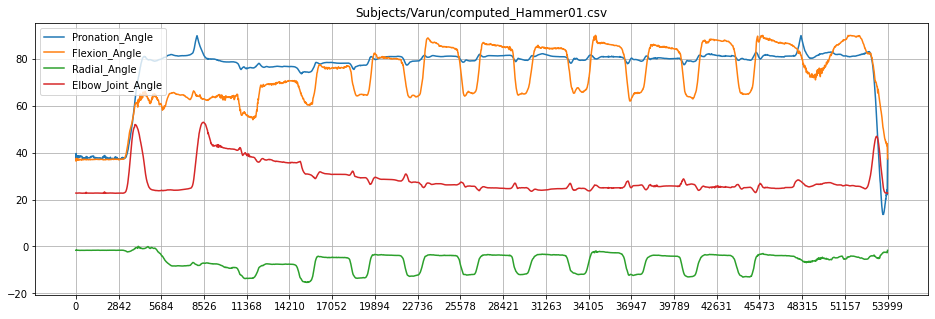

In [9]:
file = 'Subjects/Varun/computed_Hammer01.csv'
angle_lables = ['Pronation_Angle','Flexion_Angle',  'Radial_Angle','Elbow_Joint_Angle']
emg_labels = ['EMG1','EMG2','EMG3','EMG4','EMG5','EMG6','EMG7','EMG8']
main_df = pd.read_csv(file,index_col=0)
main_df[angle_lables].plot(figsize=(16,5),title=file,grid=True,xticks=np.linspace(main_df.index[0],main_df.index[-1],20))

<AxesSubplot:>

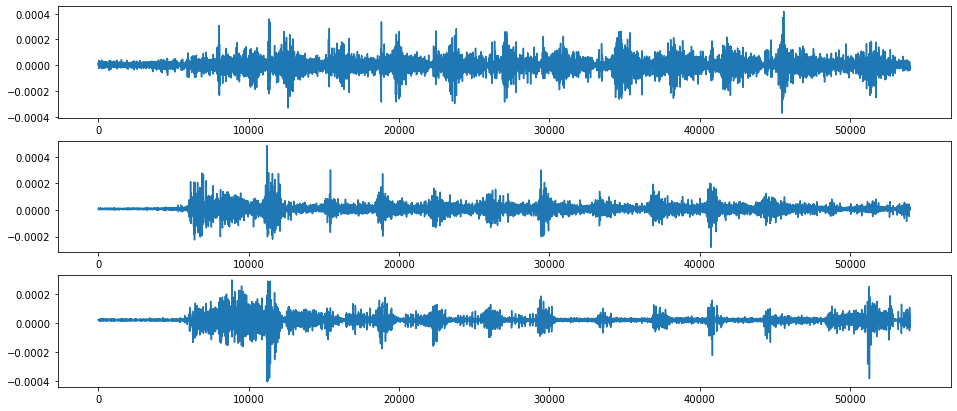

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=1)

main_df['EMG1'].plot(ax=axes[0],figsize=(16,7))
main_df['EMG4'].plot(ax=axes[1],figsize=(16,7))
main_df['EMG6'].plot(ax=axes[2],figsize=(16,7))

In [13]:
df = main_df

<AxesSubplot:>

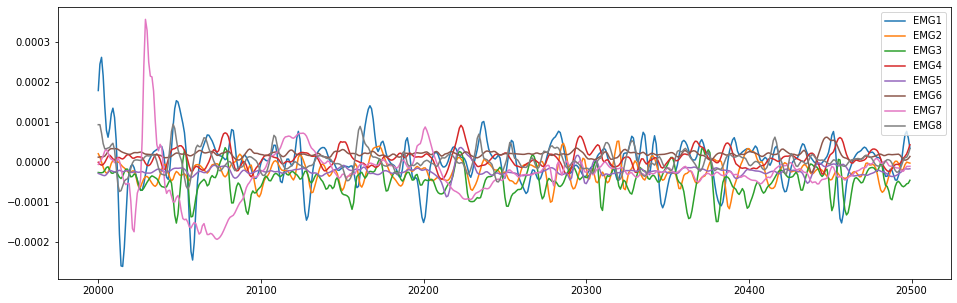

In [14]:
sig = df[emg_labels]
sig[20000:20000+500].plot(figsize=(16,5))

<AxesSubplot:>

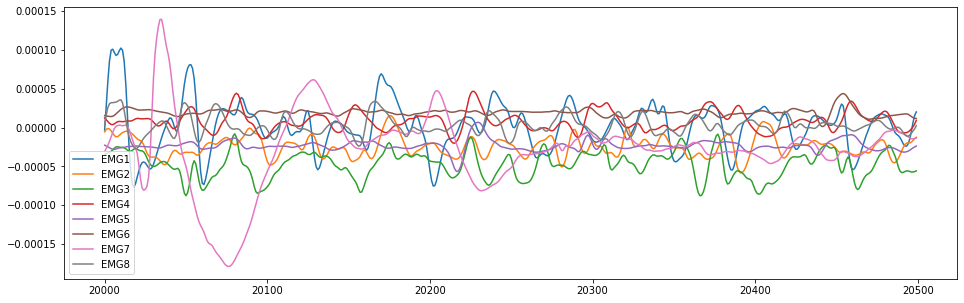

In [20]:
b,a = signal.butter(1, 50,fs=2000)
lsig = pd.DataFrame(columns=emg_labels)
for labels in lsig.columns:
    lsig[labels] = signal.lfilter(b, a,sig[labels])
lsig[20000:20000+500].plot(figsize=(16,5))

<AxesSubplot:>

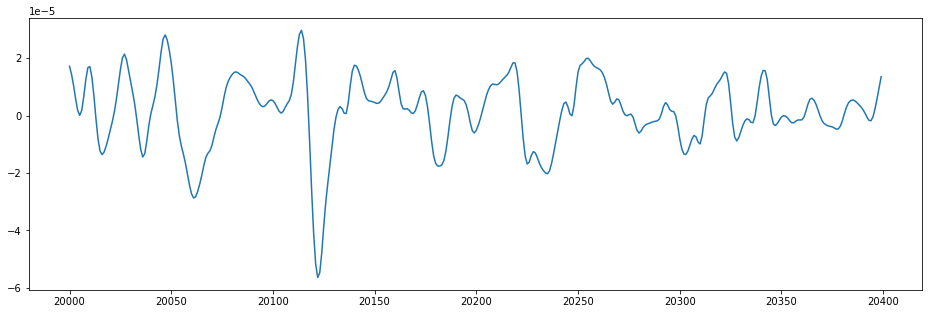

In [51]:
slsig = lsig['EMG1']
slsig[20000:20000+400].plot(figsize=(16,5))

In [81]:
float(snr_scale(100,slsig))

1.1131326526842519e-08

<AxesSubplot:>

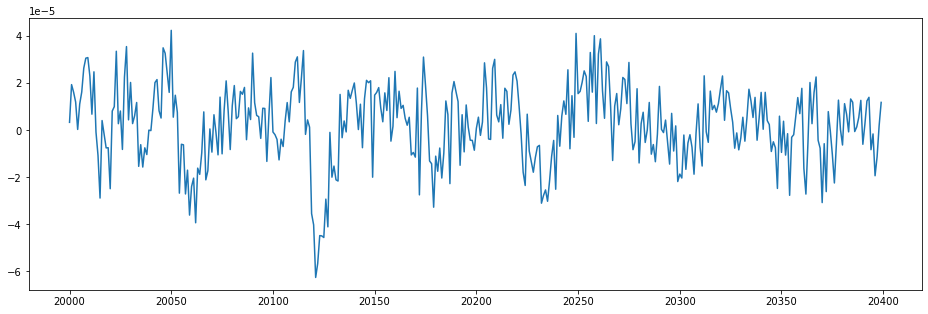

In [89]:
noise = np.random.normal(slsig.mean(),snr_scale(40,slsig),len(slsig))
pd.Series(slsig+noise)[20000:20000+400].plot(figsize=(16,5))

# Signal Analysis

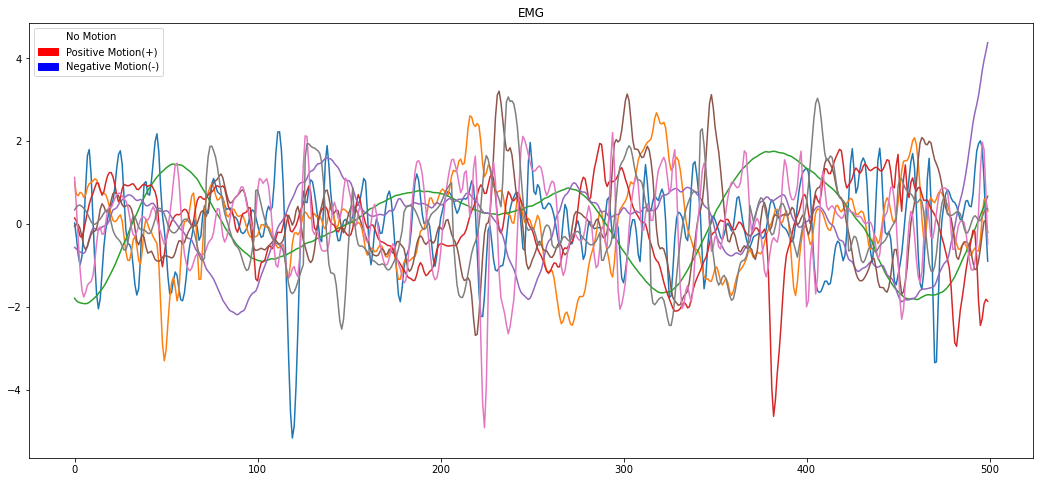

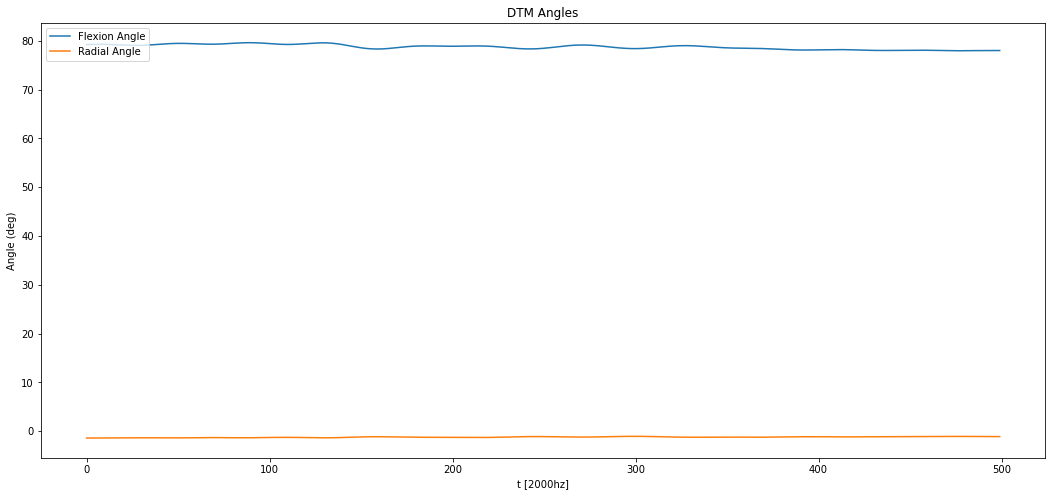

0 -> 100.0 %
1 -> 0.0 %
2 -> 0.0 %


In [47]:
X, y = prep_data_DTM(df[20000:20000+500],200,interval=5,Normalize=True,plot=True,angle_thresh=0.008,rms=False)

In [59]:
df = df[25714:25714+400]

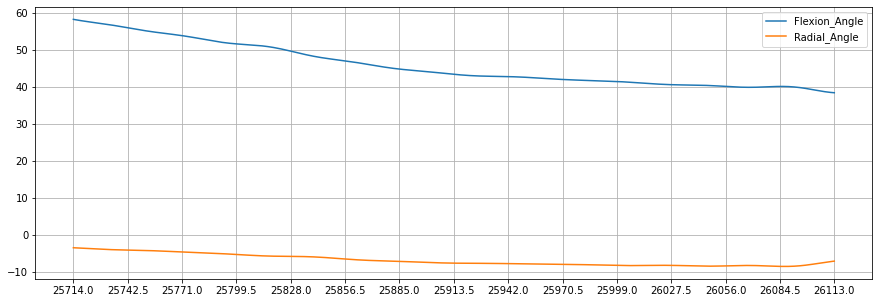

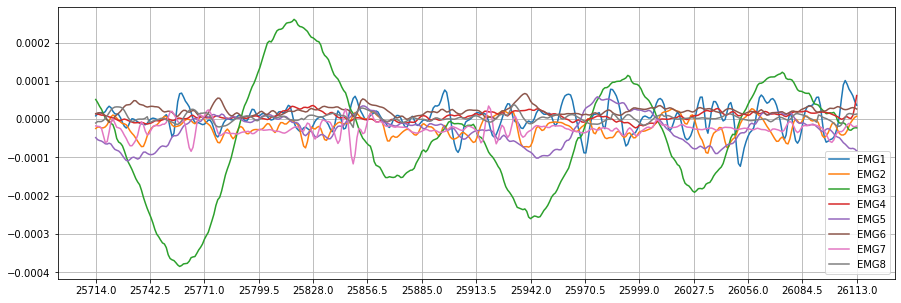

<AxesSubplot:>

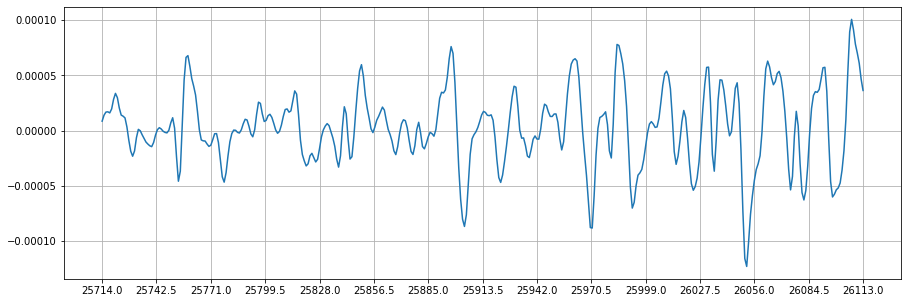

In [60]:
emg1 = df['EMG1']
y = np.array(emg1)
df[angle_lables[1:3]].plot(figsize=(15,5),xticks=np.linspace(df.index[0],df.index[-1],15),grid=True)
plt.show()
df[emg_labels].plot(figsize=(15,5),xticks=np.linspace(df.index[0],df.index[-1],15),grid=True)
plt.show()
df['EMG1'].plot(figsize=(15,5),xticks=np.linspace(df.index[0],df.index[-1],15),grid=True)

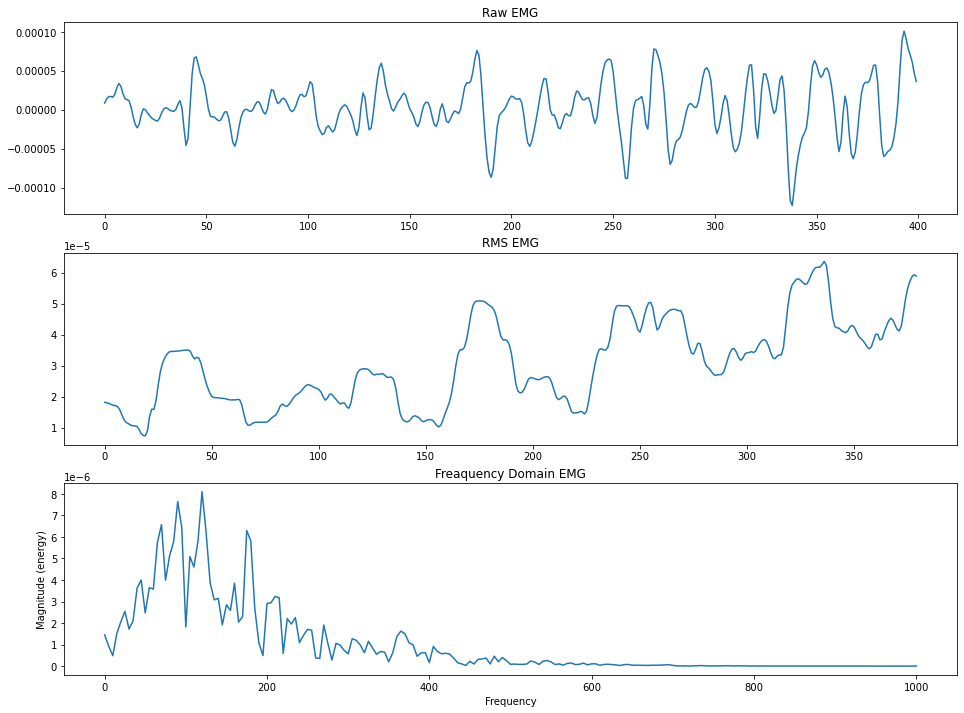

In [57]:
single_analyse(y,20)

## Window Signal Analysis

In [71]:
emg = df[emg_labels]
y_win = np.array(emg)

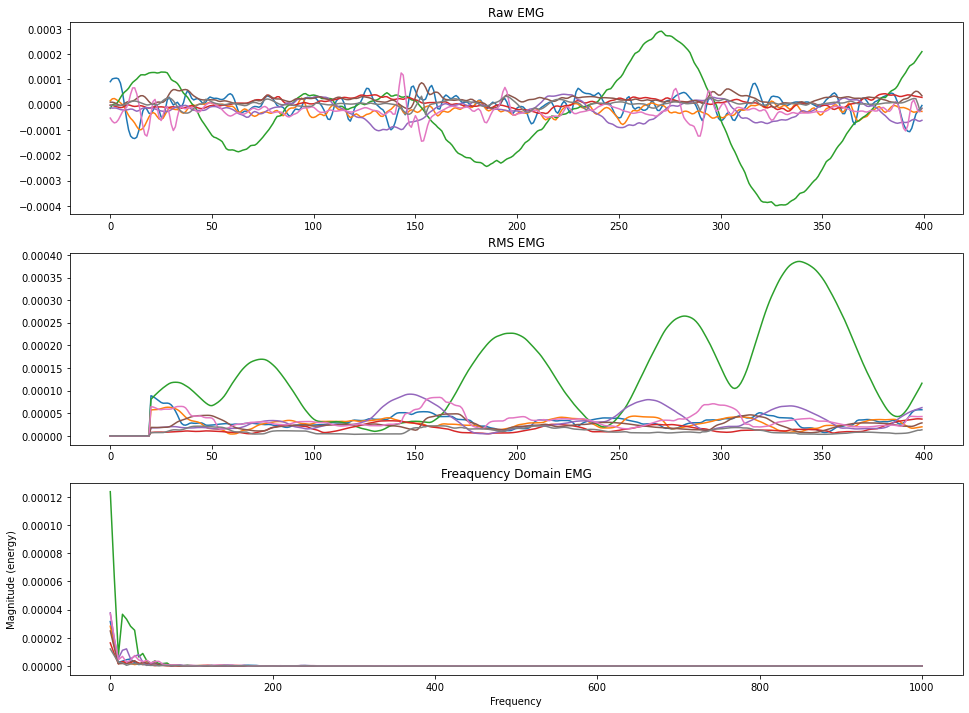

In [72]:
window_analyse(y_win,20)

In [ ]:
files = []
path = 'Subjects/Fazil/day_04_24_21'
# trial_names = ['Hammer'] # 'Bulb','Hammer' ,'Cup','Screw'
trial_names = ['Bulb','Hammer' ,'Cup','Screw']
for exp in trial_names:
    for i in range(3):
        if(i==0):
            files.append(path+'/computed_'+exp+'.csv')
        else:
            files.append(path+'/computed_'+exp+'0'+str(i)+'.csv')
files

In [ ]:
files_df = []
for file in files:
    files_df.append(pd.read_csv(file,index_col=0))

In [ ]:
window = 400
interval = 15
Normalize = False
rms = False
angle_thresh_DTM = 0.008

In [ ]:
X, y = multiple_prep_data_DTM(files_df,
                              window,
                              interval,
                              Normalize,
                              rms,
                              angle_thresh_DTM)
print(X_dtm.shape,y_dtm.shape)

## Neural Networks

In [83]:
X, y = prep_data_DTM(df,400,interval=5,Normalize=False,angle_thresh=0.008)

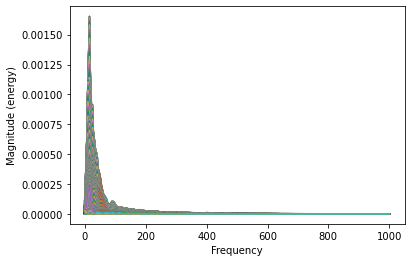

In [84]:
freq_X = []
scaler= MinMaxScaler(feature_range=(0,1))
for i in tqdm(range(X.shape[0])):
    freq_X.append(scaler.fit_transform(freaq_window(X[i])))
X = np.array(freq_X)

In [74]:
count(y)

0 - 6271 [ 58.49813432835821 %]
1 - 1648 [ 15.373134328358208 %]
2 - 2801 [ 26.128731343283583 %]


### Sklearn

In [76]:
new_X = []
for x in X:
    new_X.append(x.flatten())
X = np.array(new_X)
y = np.array([ele.argmax() for ele in y])
print(X.shape,y.shape)

(10720, 1608) (10720,)


In [79]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', 
                    hidden_layer_sizes=(20, 5), 
                    random_state=1,
                    max_iter=20000,
                    verbose=True)

In [80]:
clf.fit(X, y)

Iteration 1, loss = 0.87571530
Iteration 2, loss = 0.75683135
Iteration 3, loss = 0.66968416
Iteration 4, loss = 0.59457504
Iteration 5, loss = 0.52685843
Iteration 6, loss = 0.47431117
Iteration 7, loss = 0.43216875
Iteration 8, loss = 0.39143475
Iteration 9, loss = 0.36206964
Iteration 10, loss = 0.33335414
Iteration 11, loss = 0.30715857
Iteration 12, loss = 0.28398694
Iteration 13, loss = 0.26142583
Iteration 14, loss = 0.24087719
Iteration 15, loss = 0.16063594
Iteration 16, loss = 0.12430683
Iteration 17, loss = 0.11133650
Iteration 18, loss = 0.09779594
Iteration 19, loss = 0.09080390
Iteration 20, loss = 0.08427083
Iteration 21, loss = 0.07879280
Iteration 22, loss = 0.07543988
Iteration 23, loss = 0.07647943
Iteration 24, loss = 0.06751465
Iteration 25, loss = 0.06642511
Iteration 26, loss = 0.06604383
Iteration 27, loss = 0.06163446
Iteration 28, loss = 0.06096759
Iteration 29, loss = 0.06065362
Iteration 30, loss = 0.05780873
Iteration 31, loss = 0.05861736
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(20, 5), max_iter=20000, random_state=1,
              verbose=True)

In [81]:
pred = clf.predict(X)

In [82]:
acc = 0
for i in range(len(pred)):
    if pred[i]==y[i]:
        acc = acc + 1
acc = acc/len(y)
print('Acc-',acc)

Acc- 0.9845149253731343


### Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
n_outputs = 2

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1],X.shape[2])))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
# model.add(Dense(64,activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

opt = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model.summary()

In [ ]:
# Fit the model
model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)